**PROJECT BASED**

**KELAS : IF-44-05**

**ANGGOTA KELOMPOK :**
1.   Pradeva Faiuz Zabbar - 1301202034
2.   Muhammad Reza Adi Nugraha - 1301204078
3.   Elroi Yoshua - 1301204178
4.   Refky Fauzi Deshaputra - 1301204218

**Link Dataset :** [autos_mpg](https://drive.google.com/drive/u/1/folders/1HmKavcNCij76k02nCYQdP012cepM2nmz)

**Note : Simpan salinan file buat Running**


**afsdsfd**

# **FORMULASI MASALAH ⌛**

Tugas regresi adalah tugas memprediksi tingkat kehematan bahan bakar kendaraan/MPG (miles per gallon: rataan jarak tempuh mobil dalam mil untuk setiap galon bahan bakar yang dikonsumsi) berdasarkan profil mobil yang diberikan yang diwakili oleh atribut-atribut seperti silinder, daya (tenaga kuda), tahun keluaran, dll.


Informasi atribut.
1. **mpg: continuous (target attribute)**
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

# **PRA-PEMROSESAN DATA 📊**

## Library dan Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
pd.options.mode.chained_assignment = None
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
pd.options.mode.chained_assignment = None


In [ ]:
df = pd.read_csv('/content/autos_mpg.csv')
print(df.shape)
df

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


## Penanganan Nilai NULL

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
# Terdapat data NULL menggunakan string "?"
index = 0
list_index = []
for value in df["horsepower"]:
  if value == "?":
    list_index.append(index)
  index += 1
print(list_index)
print(df["horsepower"][32], df["horsepower"][126], df["horsepower"][330], df["horsepower"][336], df["horsepower"][354], df["horsepower"][374])

[32, 126, 330, 336, 354, 374]
? ? ? ? ? ?


In [ ]:
# Ubah semua "?" menjadi None
for idx in list_index:
  df["horsepower"][idx] = None
print(df["horsepower"][32], df["horsepower"][126], df["horsepower"][330], df["horsepower"][336], df["horsepower"][354], df["horsepower"][374])

None None None None None None


In [ ]:
# Ubah tipe data kolom horsepower menjadi numeric
df["horsepower"] = pd.to_numeric(df["horsepower"])

In [ ]:
# Isi data None pada kolom horsepower menjadi nilai mean kolom tersebut
df.fillna(value=df["horsepower"].mean(), inplace=True)
print(df["horsepower"][32], df["horsepower"][126], df["horsepower"][330], df["horsepower"][336], df["horsepower"][354], df["horsepower"][374])

104.46938775510205 104.46938775510205 104.46938775510205 104.46938775510205 104.46938775510205 104.46938775510205


In [ ]:
sum_null = df.isnull().sum().sum()
print("Jumlah Missing Value : ", sum_null)

Jumlah Missing Value :  0


## Eksplorasi Data

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.469388,38.199187,46.0,76.000,95.0,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


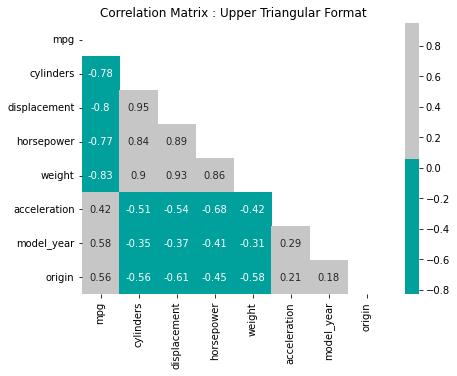

In [ ]:
colors = ['#00A19C','#C6C6C6']
ut = np.triu(df.corr())

fig,ax = plt.subplots(nrows = 1, ncols = 1,figsize = (15,5))
plt.subplot(1,2,1)
sns.heatmap(df.corr(),cmap = colors,annot = True,cbar = 'True',mask = ut);
plt.title('Correlation Matrix : Upper Triangular Format');

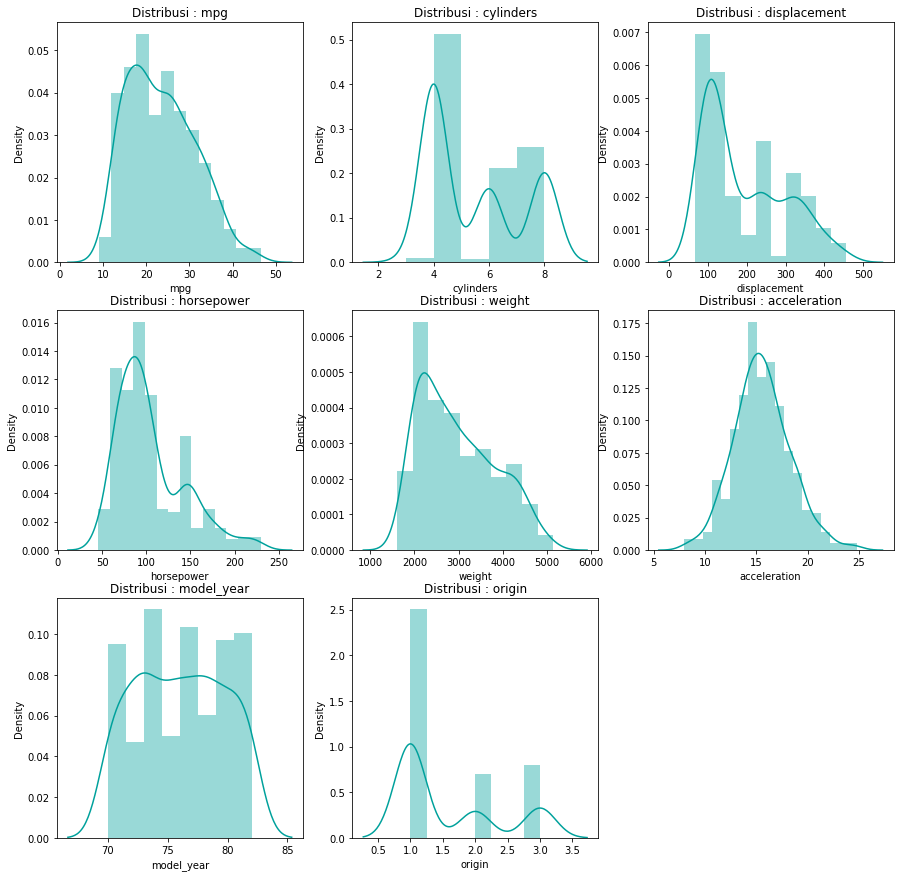

In [ ]:
col = list(df.columns)
col.remove('car_name')
numerical_features = [*col]
fig, ax = plt.subplots(nrows = 2,ncols = 4,figsize = (15,15))
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    sns.distplot(df[numerical_features[i]],color = colors[0])
    title = 'Distribusi : ' + numerical_features[i]
    plt.title(title)
plt.show()

## Split Data

In [ ]:
X = df.drop("mpg", axis=1)
X = X.drop("car_name", axis=1)
Y = df["mpg"]

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(X, Y, test_size=0.2, random_state=1)
print(X.shape, X_train.shape, X_test.shape)

(398, 7) (318, 7) (80, 7)


# **PEMODELAN 🏭**

## Gradient Boost with Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [ ]:
gbr_params = {'n_estimators': 1000,
          'max_depth': 5,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'squared_error'}

gbr = GradientBoostingRegressor(**gbr_params)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, min_samples_split=5,
                          n_estimators=1000)

In [ ]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
score = gbr.score(X_test, y_test)
print("Model Accuracy: {:.2%}".format(score))

Model Accuracy: 88.85%


In [ ]:
mse = mean_squared_error(y_test, gbr.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 6.2841


In [ ]:
feature_names = list()
for nama_kolom in X_train:
  feature_names.append(nama_kolom)

feature_names

['cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year',
 'origin']

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


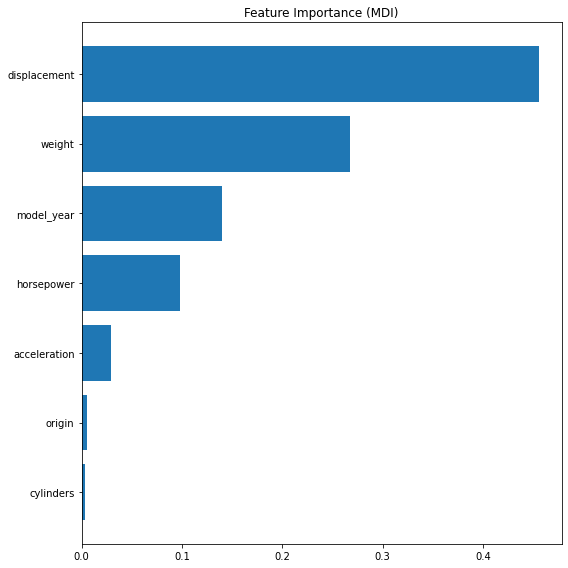

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

feature_importance = gbr.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(feature_names)[sorted_idx])
plt.title('Feature Importance (MDI)')
result = permutation_importance(gbr, X_test_std, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()

# **EVALUASI ✍**

Sebelum melakukan boosting dataset disini kami memanggil library yang diperlukan terlebih dahulu seperti pandas,numpy,matplotlib,dan sklearn. Lalu kita panggil datasetnya kedalam variabel df
Setelah itu kita melakukan Pra Pemrosesan data seperti penanganan nilai NULL dan membagi dua dataset menjadi X dan Y. Kita juga melakukan eksplorasi data berupa korelasi matriks yang dimana kolom kolom diatas itu saling berkorelasi dan ada yang berkorelasi negatif dan positif.Ada juga graph distribusi data dimana kita dapat melihat persebaran datanya cenderung ke kiri atau ke kanan. Setelah itu baru kita memulai mengolah data dengan menggunakan library sklearn
disini kita mengimport kembali library yang dibutuhkan di dalam sklearn lalu kita tentukan parameter apa saja yang akan dipakai dalam gradient boost kita. Disini kami memakai parameter
'n_estimators': 1000,'max_depth': 5,'min_samples_split': 5,'learning_rate': 0.01,'loss': 'squared_error'. Lalu kita panggil methode GradientBoostingRegressor dan memasukan parameter yang telah kita tentukan
disini data akan otomatis di boosting.Di dalam boosting ini akan melakukan koreksi Error yang terdapat pada data sebelumnya dengan mengganti residu error dari data sebelumnya. Lalu kita fit kedalam variable X_train dan Y_train. Setelah itu kita dapat melihat accuracy score dari model dan mean squared error dari data test kita. Lalu kita juga membuat
perbandingan feature mana saja yang paling berpengaruh bagi target. 

In [ ]:
data_test = X_test.reset_index()
actual_data = y_test.reset_index()


hasil_prediksi = gbr.predict(X_test)
hasil_prediksi = hasil_prediksi.tolist()
predicted_mpg = {"predicted_mpg":hasil_prediksi}
df_predicted_mpg = pd.DataFrame(predicted_mpg)


data_test["mpg"] = actual_data["mpg"]
data_test["predicted_mpg"] = df_predicted_mpg
data_test

,index,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg,predicted_mpg
0,174,6,171.0,97.0,2984,14.5,75,1,18.0,20.057003
1,359,4,141.0,80.0,3230,20.4,81,2,28.1,28.900558
2,250,8,318.0,140.0,3735,13.2,78,1,19.4,17.411014
3,274,5,131.0,103.0,2830,15.9,78,2,20.3,22.018638
4,283,6,232.0,90.0,3265,18.2,79,1,20.2,20.086667
...,...,...,...,...,...,...,...,...,...,...
75,146,4,90.0,75.0,2125,14.5,74,1,28.0,26.591090
76,327,5,121.0,67.0,2950,19.9,80,2,36.4,30.507451
77,223,8,318.0,145.0,4140,13.7,77,1,15.5,15.255417
78,159,8,351.0,148.0,4657,13.5,75,1,14.0,14.952793


# **EKSPERIMEN 🧪**

## Eksperimen 1, ubah presentase split data dan parameter boosting

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(X, Y, test_size=0.15, random_state=1)
print(X.shape, X_train.shape, X_test.shape)

(398, 7) (338, 7) (60, 7)


Mengubah pembagian menjadi 15 : 85

In [ ]:
gbr_params = {'n_estimators': 350,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'squared_error'}

gbr = GradientBoostingRegressor(**gbr_params)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, min_samples_split=5,
                          n_estimators=350)

Mengubah n_estimators : 350, max_depth : 3

In [ ]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
score = gbr.score(X_test, y_test)
print("Model Accuracy: {:.2%}".format(score))

Model Accuracy: 93.50%


In [ ]:
mse = mean_squared_error(y_test, gbr.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 3.4145


In [ ]:
feature_names = list()
for nama_kolom in X_train:
  feature_names.append(nama_kolom)

feature_names

['cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year',
 'origin']

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


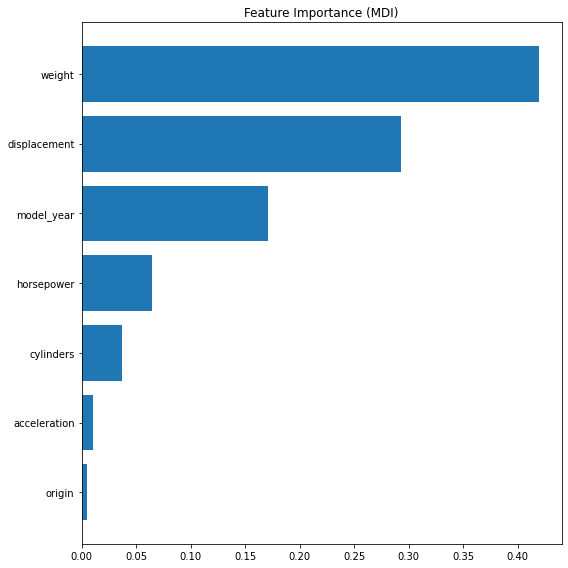

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

feature_importance = gbr.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(feature_names)[sorted_idx])
plt.title('Feature Importance (MDI)')
result = permutation_importance(gbr, X_test_std, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()

## Eksperimen 2, drop weight dan origin

In [ ]:
X = df.drop("mpg", axis=1)
X = X.drop("car_name", axis=1)
X = X.drop("weight", axis=1)
X = X.drop("origin", axis=1)
Y = df["mpg"]

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(X, Y, test_size=0.15, random_state=1)
print(X.shape, X_train.shape, X_test.shape)

(398, 5) (338, 5) (60, 5)


In [ ]:
gbr_params = {'n_estimators': 350,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'squared_error'}

gbr = GradientBoostingRegressor(**gbr_params)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, min_samples_split=5,
                          n_estimators=350)

In [ ]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
score = gbr.score(X_test, y_test)
print("Model Accuracy: {:.2%}".format(score))

Model Accuracy: 92.40%


In [ ]:
mse = mean_squared_error(y_test, gbr.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 3.9908


In [ ]:
feature_names = list()
for nama_kolom in X_train:
  feature_names.append(nama_kolom)

feature_names

['cylinders', 'displacement', 'horsepower', 'acceleration', 'model_year']

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


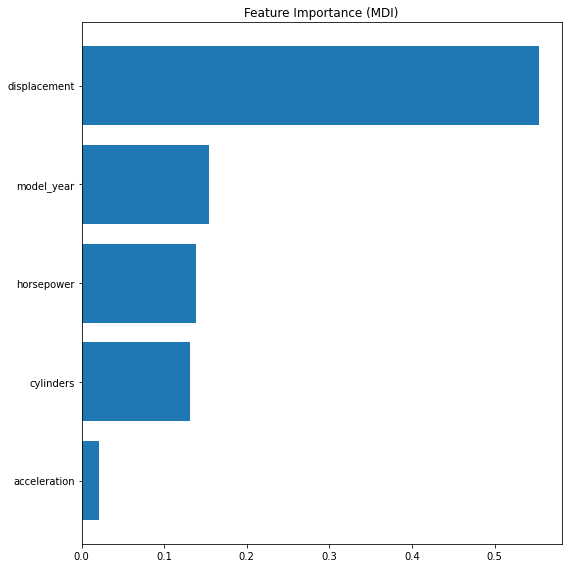

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

feature_importance = gbr.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(feature_names)[sorted_idx])
plt.title('Feature Importance (MDI)')
result = permutation_importance(gbr, X_test_std, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()

# **KESIMPULAN ⭐**

Saat melakukan Gradient Boosting dengan regresi didapatkan accuracy 88% dan Mean Squared Error 6.350. Namun setelah melakukan eksperimen pertama, yaitu mengubah split data dimana datanya akan dibagi menjadi 15 : 85, lalu params n_estimators diubah menjadi 350 dan params max_depth menjadi 3, didapatkan accuracy yang lebih baik yaitu sebesar 93.46% dan Mean Squared Error yang lebih kecil yaitu 3.430. Lalu kita melakukan eksperimen kedua, yaitu dengan cara drop weight dan origin, eksperimen ini dilakukan karena weight dan origin merupakan feature importance terbesar. Didapatkan accuracy sebesar 92.28% dan Mean Squared Error sebesar 4.0571. Maka dapat disimpulkan bahwa eksperimen dengan mengubah split data dan params akan menghasilkan Model Accuracy yang lebih baik dan MSE yang lebih kecil.

